In [1]:
# (1) 데이터 가져오기

import pandas as pd
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


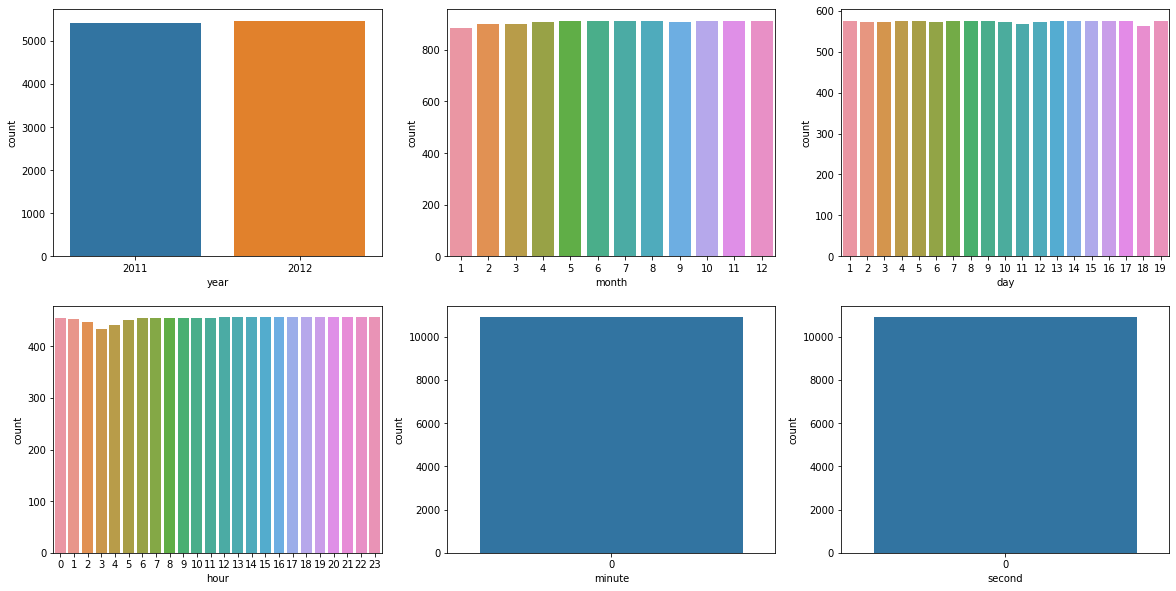

In [3]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()

In [4]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split
# minute, second 데이터 의미 없어 미포함
# year : 2개연도로는 추세예측에 악영향일 것으로 예상되어 미포함
# casual , registered : 등록여부 미포함
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',  'month', 'day', 'hour',]].values
y = train[['count']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
# (5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions, squared = True)
rmse = mean_squared_error(y_test, predictions, squared = False)
print('mse : ' + str(mse))
print('rmse : ' + str(rmse))

mse : 21454.3048809868
rmse : 146.47288104282921


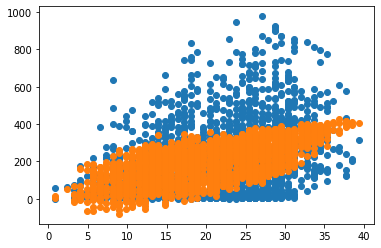

In [7]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# temp로 시각화
plt.scatter(X_test[:, 3], y_test)
plt.scatter(X_test[:, 3], predictions)
plt.show()

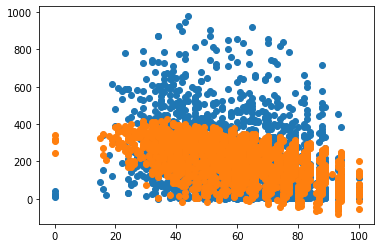

In [8]:
# humidity로 시각화
plt.scatter(X_test[:, 5], y_test)
plt.scatter(X_test[:, 5], predictions)
plt.show()